In [7]:
# 可视化对比患者健侧患侧差别

import pandas as pd
import seaborn as sns
from sklearn import preprocessing

from iFEMG_feature import *

In [75]:
# 读取数据，包含双侧三个肌肉信号通道的特征值
affected_df = pd.read_csv(r"E:\Data\积水潭患者数据集\0919s2\0919s2\affected\0919s2_bicps_br_absnew.csv", index_col=0, header=[0,1])
healthy_df = pd.read_csv(r"E:\Data\积水潭患者数据集\0919s2\0919s2\healthy\0919s2_bicps_br_absnew.csv", index_col=0, header=[0,1])
healthy_df.head

<bound method NDFrame.head of        bicps_br                                                          \
   subject_name height(cm) weight(kg) gender age label(kg)          FMG   
0        0919s2        175         72      1  68       0.0  2729.803965   
1        0919s2        175         72      1  68       0.0  2928.673775   
2        0919s2        175         72      1  68       0.0  2917.946154   
3        0919s2        175         72      1  68       0.0  3004.896423   
4        0919s2        175         72      1  68       0.0  2961.265193   
5        0919s2        175         72      1  68       0.0  3014.795433   
6        0919s2        175         72      1  68       0.0  2916.186091   
7        0919s2        175         72      1  68       0.5  3711.962367   
8        0919s2        175         72      1  68       0.5  3901.481136   
9        0919s2        175         72      1  68       0.5  4131.249179   
10       0919s2        175         72      1  68       0.5  4265.01772

In [76]:
# 需要归一化对比的列名
col_name=[("bicps_br", "FMG"),
        ("bicps_br", "mav"),
        ("bicps_br", "rms"),
        ("bicps_br", "wave_length"),
        ("bicps_br", "zero_crossing"),
        ("bicps_br", "slope_sign_change"),
        ("bicps_br", "mean_freq"),
        ("bicps_br", "mean_power_freq"),
        ("tricps_br_medial", "FMG"),
        ("tricps_br_medial", "mav"),
        ("tricps_br_medial", "rms"),
        ("tricps_br_medial", "wave_length"),
        ("tricps_br_medial", "zero_crossing"),
        ("tricps_br_medial", "slope_sign_change"),
        ("tricps_br_medial", "mean_freq"),
        ("tricps_br_medial", "mean_power_freq"),
        ("tricps_br_lateral", "FMG"),
        ("tricps_br_lateral", "mav"),
        ("tricps_br_lateral", "rms"),
        ("tricps_br_lateral", "wave_length"),
        ("tricps_br_lateral", "zero_crossing"),
        ("tricps_br_lateral", "slope_sign_change"),
        ("tricps_br_lateral", "mean_freq"),
        ("tricps_br_lateral", "mean_power_freq")]

# 用健侧初始化scaler
scaler = preprocessing.StandardScaler().fit(healthy_df[col_name])
# 对双侧进行归一化
healthy_df_normed = df_norm_with_selfscaler(healthy_df, col_name, scaler)
affected_df_normed = df_norm_with_selfscaler(affected_df, col_name, scaler)

In [83]:
# 更改肌肉名称 "bicps_br" "tricps_br_lateral" "tricps_br_medial"
show_name = "bicps_br"

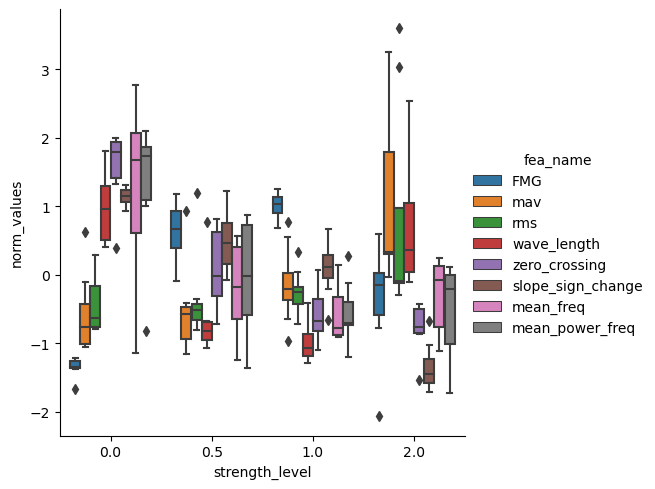

In [84]:
"""
健侧
特征可视化
归一化特征值大小----肌力重量
"""
# 需要显示和归一化的特征名称
col_name = ['FMG', 'mav', 'rms', 'wave_length', 'zero_crossing', 'slope_sign_change', 'mean_freq', 'mean_power_freq']

# show figure
show_df = pd.DataFrame(columns = ('strength_level', 'norm_values', 'fea_name'))

for index, row in healthy_df_normed[show_name].iterrows():    # go through each row
    for i in col_name:
        show_df = pd.concat([show_df, pd.DataFrame({'strength_level': [row['label(kg)']],
                                                    'norm_values': [row[i]],
                                                    'fea_name': [i]})], axis = 0, ignore_index = True)
# kind = point(两点连线带errbar)/violin(小提琴图)/box(箱线图)
sns.catplot(x = "strength_level",
            y = "norm_values",
            hue = "fea_name",
            data = show_df,
            kind = 'box')

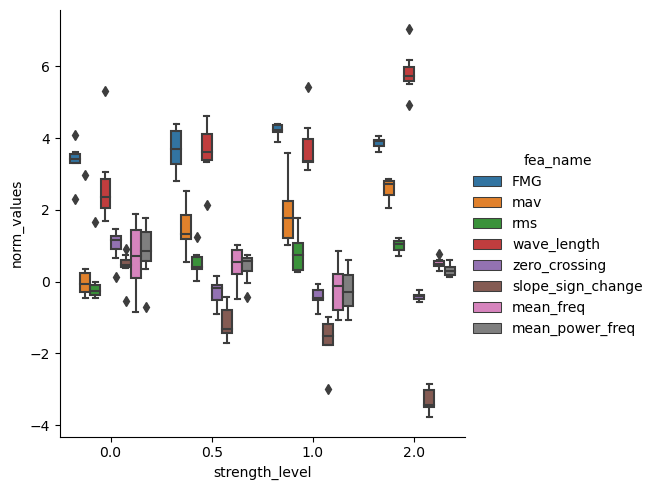

In [85]:
"""
患侧
特征可视化
归一化特征值大小----肌力重量
"""
# 需要显示和归一化的特征名称
col_name = ['FMG', 'mav', 'rms', 'wave_length', 'zero_crossing', 'slope_sign_change', 'mean_freq', 'mean_power_freq']

# show figure
show_df = pd.DataFrame(columns = ('strength_level', 'norm_values', 'fea_name'))

for index, row in affected_df_normed[show_name].iterrows():    # go through each row
    for i in col_name:
        show_df = pd.concat([show_df, pd.DataFrame({'strength_level': [row['label(kg)']],
                                                    'norm_values': [row[i]],
                                                    'fea_name': [i]})], axis = 0, ignore_index = True)
# kind = point(两点连线带errbar)/violin(小提琴图)/box(箱线图)
sns.catplot(x = "strength_level",
            y = "norm_values",
            hue = "fea_name",
            data = show_df,
            kind = 'box')